# **Atividade avaliativa**

> **ESPECIALIZÇÃO EM ANÁLISE E CIÊNCIA DE DADOS | Univerisdade Franciscana (UFN)**

**Módulo:** Machine Learning <br>
**Instrutor:** Vinícius Rodrigues Oviedo <br>
**Data de referência:** julho de 2024 <br>

Instruções:
- Entregar o arquivo final no moodle no formato `.ipynb`
- Nomear arquivo no formato `nome_sobrenome.ipynb`

# Alunos: Daniel Dallasta; Fernando Campagnolo
Data: 30/07/2024


## **Questão 1**

Considere os seguintes contextos:

1. Um estabelecimento destinado ao fornecimento de cafés do tipo especial e gourmet deseja prever a demanda (volume de vendas) dos seus produtos para a próxima quinzena, com base em dados históricos como `número de visitas na loja`, `número de visitas no site`, `preço unitário de cada produto`, `conversões para cada produto`, `vendas sem desconto`, `vendas com desconto`, `volume de vendas total`. A partir do modelo preditivo obtido, esse estabelecimento visa uma gestão de estoque mais eficiente.

2. Uma instituição financeira deseja prever, por meio de técnicas de Machine Learning, transações fraudulentas na conta de seus clientes. O objetivo é utilizar tal análise preditiva para elaborar regras de negócio que promovam mais segurança aos usuários e permita a mitigação de riscos. Para isso, ela tem como base dados históricos, onde constam parâmetros como `ID da transação`, `valor da transação`, `localização`, `saldo na data da transação`, `limite de crédito`, `renda informada durante a última atualização de cadastro`, `limite de pix diário`, `transação supeita? (1/0) `.

3.  Uma empresa de eletrônicos trabalha com venda de laptops e conta com um conjunto de características técnicas de cada produto contido em seu banco de dados (e.g., `processador`, `memória RAM`, `SSD`, `tamanho da tela`, `tipo de placa gráfica`, `preço`, `marca`, `sistema operacional`, entre outros). Por meio de Machine Learning, essa empresa deseja agrupar laptops com caterísticas similares, de modo que a permite identificar segmentos de mercado distintos, como laptops para jogos, laptops de uso profissional que requerem maior desempenho, laptops compactos e leves para mobilidade, entre outros.

4. Um time de cientistas de dados está utilizando o algoritmo Decision Tree (Árvore de Decisão) para prever se um equipamento da linha de produção vai apresentar `falhas ou não`, com base em `dados dos sensores`, `padrões de uso do equipamento` e `histórico de manutenção`.

5. Um empresa de *e-commerce* está utilizando modelos de Machine Learning para segmentar (agrupar) seus produtos em galpões de distribuição (armazenamento temporário) de acordo com a frequência que são comprados juntos e com a localidade. Assim, se consegue otimizar o tempo de de entrega e a gestão do inventário de produtos.

Classifique cada contexto quanto tipo problema de Machine Learning:

(  ) Clusterização (agrupamento) <br>
(  ) Regressão <br>
(  ) Classificação <br>





> Resolução:

Um breve resumo sobre cada tipo de problema de Machine Learning:

- A **Clusterização** é uma técnica para agrupar dados em clusters (grupos), que compartilham características similares.
- A **Regressão** é usada para prever um valor contínuo com base nos dados históricos fornecidos.
- A **Classificação** é utilizada para prever categorias ou classes discretas de acordo com os dados fornecidos.

1 - Como o objetivo do contexto é prever a *demanda (volume de vendas)* com base no histório, classifico esse tipo de problema como **Regressão**.

2 - O objetivo desse contexto é prever *transações fraudulentas* na conta de clientes, ou seja, utilizar uma base dados históricos para treinar os modelos e classificar se as transações são fraudulentas ou não, dessa forma, classifico esse tipo de problema como **Classificação**.

3 - O objetivo desse contexto é *agrupar* laptops com caterísticas similares, a fim de identificando segmentos de mercado *distintos*. Se já houvesse uma classificação para identificar produtos, tais como notebook gamer, ultra book e notebook para o dia a dia, seria classificação. Entretanto, como não há categorias e o intuito é idendificar segmentos de mercado, classifico esse tipo de problema como **Clusterização**.

4 - Esse contexto traz qual o algorítmo que será utilizado, que é o *Decision Tree*, algoríimo utilizado para resolver problemas de classificação ou Regressão. O objetivo é identificar, com base em dados históricos, se o equipamento vai *apresentar falhas ou não*, ou seja, classificar em uma dessas 2 categorias. Nesse caso, classifico esse tipo de problema como **Classificação**.

5 - Semelhante ao número 3, o objetivo é *agrupar* os protutos de acordo com a frequência que são comprados juntos e com a localidade, ou seja, agrupar os itens que compartilham características similares. Como não há categorias,  classifico esse tipo de problema como **Clusterização**.

**OK**

## **Questão 2**

Na figura abaixo, temos os 3 tipos de problemas que buscamos resolver via Machine Learning.

<img src="https://github.com/OviedoVR/ML_especializacao/blob/main/assets/problems-ml-charts.png?raw=true" width="60%"/>

Diferencie, em poucas palavras, **aprendizado supervisionado** e **aprendizado não-supervisionado**.



> Resolução:

**Aprendizado Supervisionado**: Imagine que você está ensinando uma criança a identificar frutas. Você mostra uma maçã e diz "Isso é uma maçã", depois mostra uma banana e diz "Isso é uma banana". A criança aprende a associar a aparência da fruta com o nome. Em aprendizado supervisionado, o algoritmo recebe dados rotulados (a fruta e o nome) e aprende a mapear as características dos dados para os rótulos corretos.

**Aprendizado Não-Supervisionado**: Agora imagine que você dá à criança uma cesta de frutas sem dizer o nome de nenhuma delas. A criança pode começar a separar as frutas por cor, tamanho ou forma, mesmo sem saber o nome delas. Em aprendizado não-supervisionado, o algoritmo recebe dados sem rótulos e busca por padrões e estruturas nos dados, como agrupamentos (clustering).

Em resumo, o **aprendizado supervisionado** aprende com exemplos rotulados para fazer predições, enquanto o **aprendizado não-supervisionado** descobre padrões em dados sem rótulos.

**OK**

## **Questão 3**

Um dos papeis do analista e do cientista de dados é traduzir o resultado de um **modelo preditivo** em **insights** acionáveis para o negócio. Nesse contexto, suponha  o seguinte tratamento de dados para a base `tips` disponível na biblioteca **seaborn** (blocos de código abaixo). Rode os códigos já disponíveis de maneira sequencial e, em seguida, obtenha um modelo de clusterizção, para responder a seguinte pergunta de negócio:

- *Qual cluster costuma dar mais gorjeta (independente do valor da conta)? Fique à vontade para responder a partir de análise gráfica ou realizando operações e cálculos sobre o dataframe clusterizado.*

> **Dicas:**

- Utilize o método do cotovelo para selecionar o número de clusters ($k$)
- Não esqueça de atribuir os clusters obtidos ao dataframe original.


In [24]:
# Bibliotecas para manipualção de dados:
import numpy as np # Biblioteca para manipulação de vetores e matrizes
import pandas as pd # Biblioteca para manipulação de dataframes

# Bibliotecas para visualização de dados:
import matplotlib.pyplot as plt # Biblioteca para plotar gráficos
import seaborn as sns # Biblioteca para plotar gráficos estatísticos

# Bibliotecas para modelagem (neste caso, clusterização com K-means):
from sklearn.cluster import KMeans # Algoritmo de clusterização K-means
from sklearn.preprocessing import StandardScaler # Algoritmo para normalização dos dados

print("Bibliotecas carregadas!!!")


Bibliotecas carregadas!!!


In [25]:
# Carregando o conjunto de dados 'tips' e salvando em um datraframe denominado 'dados_df'.
dados_df = sns.load_dataset('tips') # Carrega o conjunto de dados 'tips' da biblioteca seaborn

# Visualizacao dos dados:
print("Listagem dos dados!!!")
dados_df # Exibe o dataframe 'dados'


Listagem dos dados!!!


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


> **Dicionário de dados**

* `total_bill`: valor total gasto por comanda
* `tip`: gorjeta
* `sex`: gênero do cliente (pagante)
* `smoker`: cliente fumante ou não
* `day`: dia da semana
* `time`: almoço ou janta
* `size`:  número de pessoas que compõem o grupo em uma refeição


In [26]:
# Dicionário de dados.
# Traduzir o nomes das colunas do dataframe "dados_df" para Portugues Brasil.
dados_df.columns = ['valor_total', 'gorjeta', 'genero', 'fumante', 'dia_semana', 'turno', 'numero_pessoas_mesa'] # Colunas traduzidas
dados_df


,valor_total,gorjeta,genero,fumante,dia_semana,turno,numero_pessoas_mesa
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [27]:
# Traduzir os dados contido na coluna "genero" do dataframe "dados_df" para Portugues Brasil.
dados_df['genero'] = dados_df['genero'].replace('Female', 'Mulher').replace('Male', 'Homem') # Traduz os dados da coluna 'genero'
dados_df


,valor_total,gorjeta,genero,fumante,dia_semana,turno,numero_pessoas_mesa
0,16.99,1.01,Mulher,No,Sun,Dinner,2
1,10.34,1.66,Homem,No,Sun,Dinner,3
2,21.01,3.50,Homem,No,Sun,Dinner,3
3,23.68,3.31,Homem,No,Sun,Dinner,2
4,24.59,3.61,Mulher,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Homem,No,Sat,Dinner,3
240,27.18,2.00,Mulher,Yes,Sat,Dinner,2
241,22.67,2.00,Homem,Yes,Sat,Dinner,2
242,17.82,1.75,Homem,No,Sat,Dinner,2


In [28]:
# Traduçao dos dados da coluna "fumante" para Portugues Brasil.
dados_df['fumante'] = dados_df['fumante'].replace('No', 'Não').replace('Yes', 'Sim') # Traduz os dados da coluna 'fumante'
dados_df


,valor_total,gorjeta,genero,fumante,dia_semana,turno,numero_pessoas_mesa
0,16.99,1.01,Mulher,Não,Sun,Dinner,2
1,10.34,1.66,Homem,Não,Sun,Dinner,3
2,21.01,3.50,Homem,Não,Sun,Dinner,3
3,23.68,3.31,Homem,Não,Sun,Dinner,2
4,24.59,3.61,Mulher,Não,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Homem,Não,Sat,Dinner,3
240,27.18,2.00,Mulher,Sim,Sat,Dinner,2
241,22.67,2.00,Homem,Sim,Sat,Dinner,2
242,17.82,1.75,Homem,Não,Sat,Dinner,2


In [29]:
# Tradução da coluna "dia_semana" para Portugues Brasil.
dados_df['dia_semana'] = dados_df['dia_semana'].replace('Thur', 'Quinta-feira').replace('Fri', 'Sexta-feira').replace('Sat', 'Sábado').replace('Sun', 'Domingo') # Traduz os dados da coluna 'dia_semana'
dados_df


,valor_total,gorjeta,genero,fumante,dia_semana,turno,numero_pessoas_mesa
0,16.99,1.01,Mulher,Não,Domingo,Dinner,2
1,10.34,1.66,Homem,Não,Domingo,Dinner,3
2,21.01,3.50,Homem,Não,Domingo,Dinner,3
3,23.68,3.31,Homem,Não,Domingo,Dinner,2
4,24.59,3.61,Mulher,Não,Domingo,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Homem,Não,Sábado,Dinner,3
240,27.18,2.00,Mulher,Sim,Sábado,Dinner,2
241,22.67,2.00,Homem,Sim,Sábado,Dinner,2
242,17.82,1.75,Homem,Não,Sábado,Dinner,2


In [30]:
# TRaducao da coluna "turno" para Portugues Brasil.
dados_df['turno'] = dados_df['turno'].replace('Dinner', 'Jantar').replace('Lunch', 'Almoço') # Traduz os dados da coluna 'turno'
dados_df


,valor_total,gorjeta,genero,fumante,dia_semana,turno,numero_pessoas_mesa
0,16.99,1.01,Mulher,Não,Domingo,Jantar,2
1,10.34,1.66,Homem,Não,Domingo,Jantar,3
2,21.01,3.50,Homem,Não,Domingo,Jantar,3
3,23.68,3.31,Homem,Não,Domingo,Jantar,2
4,24.59,3.61,Mulher,Não,Domingo,Jantar,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Homem,Não,Sábado,Jantar,3
240,27.18,2.00,Mulher,Sim,Sábado,Jantar,2
241,22.67,2.00,Homem,Sim,Sábado,Jantar,2
242,17.82,1.75,Homem,Não,Sábado,Jantar,2


In [31]:
# Tamanho do dataframe (linhas, colunas):
print("Tamanho do dataframe!!!")
print("Linhas, Colunas: ")
dados_df.shape


Tamanho do dataframe!!!
Linhas, Colunas: 


(244, 7)

In [32]:
# Dias da semana no dataframe:
print("Dias da semana no dataframe (únicos)!")
dados_df['dia_semana'].unique() # Lista os dias da semana únicos


Dias da semana no dataframe (únicos)!


['Domingo', 'Sábado', 'Quinta-feira', 'Sexta-feira']
Categories (4, object): ['Quinta-feira', 'Sexta-feira', 'Sábado', 'Domingo']

In [33]:
# Valores em `turno` no dataframe:
print("Valores em ´Turno´ no dataframe (unicos)!!!")
dados_df['turno'].unique() # Lista os valores únicos em `turno`


Valores em ´Turno´ no dataframe (unicos)!!!


['Jantar', 'Almoço']
Categories (2, object): ['Almoço', 'Jantar']

In [34]:
# Criando uma nova coluna (1 se for final de semana, 0 caso contrário):
print("Criando uma nova coluna (1 se for final de semana, 0 caso contrário)!!!")
dados_df['final_semana'] = dados_df['dia_semana'].apply(lambda registro: 1 if registro in ['Sábado', 'Domingo'] else 0) # Cria uma nova coluna 'final_semana' com 1 se o dia for final de semana e 0 caso contrário

# Visualização dos dados:
print("Visualização dos dados!!!")
dados_df


Criando uma nova coluna (1 se for final de semana, 0 caso contrário)!!!
Visualização dos dados!!!


,valor_total,gorjeta,genero,fumante,dia_semana,turno,numero_pessoas_mesa,final_semana
0,16.99,1.01,Mulher,Não,Domingo,Jantar,2,1
1,10.34,1.66,Homem,Não,Domingo,Jantar,3,1
2,21.01,3.50,Homem,Não,Domingo,Jantar,3,1
3,23.68,3.31,Homem,Não,Domingo,Jantar,2,1
4,24.59,3.61,Mulher,Não,Domingo,Jantar,4,1
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Homem,Não,Sábado,Jantar,3,1
240,27.18,2.00,Mulher,Sim,Sábado,Jantar,2,1
241,22.67,2.00,Homem,Sim,Sábado,Jantar,2,1
242,17.82,1.75,Homem,Não,Sábado,Jantar,2,1


In [36]:
# Encoding (codificação) de todas as variáveis categóricias no dataframe dados_df.
# Seguir as seguintes regras:
# Coluna "genero": Mulher = 0; Homem = 1
# Coluna "fumante": Não = 0; Sim = 1
# Coluna "dia_semana": Quinta-feira = 0; Sexta-feira = 1; Sábado = 2; Domingo = 3;
# Coluna "turno": Almoço = 0; Jantar = 1

dados_df['genero'] = dados_df['genero'].replace('Mulher', 0).replace('Homem', 1) # Codifica a coluna 'genero'
dados_df['fumante'] = dados_df['fumante'].replace('Não', 0).replace('Sim', 1) # Codifica a coluna 'fumante'
dados_df['dia_semana'] = dados_df['dia_semana'].replace('Quinta-feira', 0).replace('Sexta-feira', 1).replace('Sábado', 2).replace('Domingo', 3) # Codifica a coluna 'dia_semana
dados_df['turno'] = dados_df['turno'].replace('Almoço', 0).replace('Jantar', 1) # Codifica a coluna 'turno'

# Visualização dos dados:
print("Visualização dos dados!!!")
dados_df


Visualização dos dados!!!


,valor_total,gorjeta,genero,fumante,dia_semana,turno,numero_pessoas_mesa,final_semana
0,16.99,1.01,0,0,3,1,2,1
1,10.34,1.66,1,0,3,1,3,1
2,21.01,3.50,1,0,3,1,3,1
3,23.68,3.31,1,0,3,1,2,1
4,24.59,3.61,0,0,3,1,4,1
...,...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,2,1,3,1
240,27.18,2.00,0,1,2,1,2,1
241,22.67,2.00,1,1,2,1,2,1
242,17.82,1.75,1,0,2,1,2,1


In [38]:
# Copia do dataframe antes de tratar os dados:
dados_originais = dados_df.copy()
print("Copia do dataframe realizada!!!")


Copia do dataframe realizada!!!


In [39]:
# Normalização das colunas numéricas:

# Normalização da coluna 'valor_total'
valor_total_media = dados_df['valor_total'].mean() # Média da coluna 'valor_total'
valor_total_desviopadrao = dados_df['valor_total'].std() # Desvio padrão da coluna 'valor_total'
dados_df['valor_total'] = dados_df['valor_total'].apply(lambda registro: (registro - valor_total_media) / valor_total_desviopadrao) # Normalização da coluna 'valor_total'

# Normalização da coluna 'gorjeta'
gorjeta_media = dados_df['gorjeta'].mean() # Média da coluna 'gorjeta'
gorjeta_desviopadrao = dados_df['gorjeta'].std() # Desvio padrão da coluna 'gorjeta'
dados_df['gorjeta'] = dados_df['gorjeta'].apply(lambda registro: (registro - gorjeta_media) / gorjeta_desviopadrao) # Normalização da coluna 'gorjeta'

# Visualizacao dos dados
print("Visualização dos dados!!!")
dados_df


Visualização dos dados!!!


,valor_total,gorjeta,genero,fumante,dia_semana,turno,numero_pessoas_mesa,final_semana
0,-0.314066,-1.436993,0,0,3,1,2,1
1,-1.061054,-0.967217,1,0,3,1,3,1
2,0.137497,0.362610,1,0,3,1,3,1
3,0.437416,0.225291,1,0,3,1,2,1
4,0.539635,0.442111,0,0,3,1,4,1
...,...,...,...,...,...,...,...,...
239,1.038377,2.111622,1,0,2,1,3,1
240,0.830568,-0.721488,0,1,2,1,2,1
241,0.323964,-0.721488,1,1,2,1,2,1
242,-0.220833,-0.902171,1,0,2,1,2,1


> **Modelagem**

In [41]:
# Eliminando as colunas `dia_semana`e `fumante`:
print("Eliminando as colunas ´dia_semana´ e ´fumante´!!!")
dados_limpos = dados_df.drop(['dia_semana', 'fumante'], axis=1) # Elimina as colunas 'dia_semana' e 'fumante' do dataframe

# Visualização dos dados:
print("Visualização dos dados!!!")
dados_limpos


Eliminando as colunas ´dia_semana´ e ´fumante´!!!
Visualização dos dados!!!


,valor_total,gorjeta,genero,turno,numero_pessoas_mesa,final_semana
0,-0.314066,-1.436993,0,1,2,1
1,-1.061054,-0.967217,1,1,3,1
2,0.137497,0.362610,1,1,3,1
3,0.437416,0.225291,1,1,2,1
4,0.539635,0.442111,0,1,4,1
...,...,...,...,...,...,...
239,1.038377,2.111622,1,1,3,1
240,0.830568,-0.721488,0,1,2,1
241,0.323964,-0.721488,1,1,2,1
242,-0.220833,-0.902171,1,1,2,1


Seleção de k (método do cotovelo)!!!


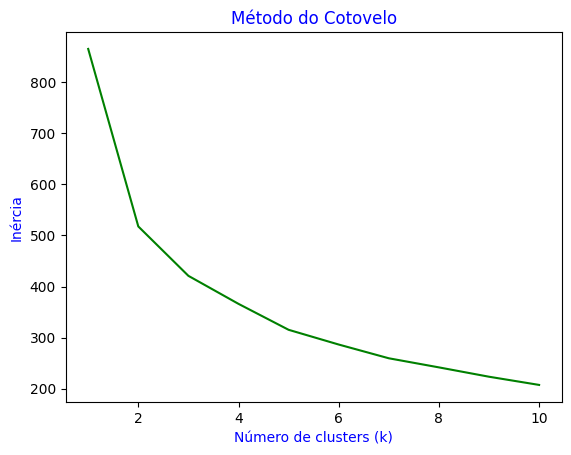

In [45]:
# Seleção de k (método do cotovelo):
print("Seleção de k (método do cotovelo)!!!")

# Lista para armazenar as inércias:
inercias = []

for k in range(1, 11): # Testa de 1 a 10 clusters
    kmeans = KMeans(n_clusters=k, n_init=10) # Instancia o modelo K-means
    kmeans.fit(dados_limpos) # Treina o modelo
    inercias.append(kmeans.inertia_) # Armazena a inércia

# Plotando o gráfico do método do cotovelo:
plt.plot(range(1, 11), inercias, color='green')
plt.xlabel('Número de clusters (k)', color='blue')
plt.ylabel('Inércia', color='blue')
plt.title('Método do Cotovelo', color='blue')
plt.show()


In [47]:
# Clusterizando os dados do dataframe "dados_limpos":
print("Clusterizando os dados!")
kmeans = KMeans(n_clusters=k, n_init=10) # Instancia o modelo K-means
kmeans.fit(dados_limpos) # Treina o modelo
clusters = kmeans.labels_ # Recupera os clusters
dados_limpos['cluster'] = clusters # Adiciona a coluna 'cluster' ao dataframe "dados_limpos"

# Visualização dos clusters:
print("Visualização dos clusters!!!")
dados_limpos


Clusterizando os dados!
Visualização dos clusters!!!


,valor_total,gorjeta,genero,turno,numero_pessoas_mesa,final_semana,cluster
0,-0.314066,-1.436993,0,1,2,1,1
1,-1.061054,-0.967217,1,1,3,1,1
2,0.137497,0.362610,1,1,3,1,5
3,0.437416,0.225291,1,1,2,1,4
4,0.539635,0.442111,0,1,4,1,2
...,...,...,...,...,...,...,...
239,1.038377,2.111622,1,1,3,1,3
240,0.830568,-0.721488,0,1,2,1,4
241,0.323964,-0.721488,1,1,2,1,1
242,-0.220833,-0.902171,1,1,2,1,1


In [85]:
# prompt: Usando o DataFrame dados_limpos: Qual é o "cluster" na qual o valor de "gorjeta" é maior?

# Agrupa os dados por 'cluster' e calcula a média da 'gorjeta' para cada grupo
media_gorjeta_por_cluster = dados_limpos.groupby('cluster')['gorjeta'].mean()

# Encontra o cluster com a maior média de gorjeta
cluster_maior_gorjeta = media_gorjeta_por_cluster.idxmax()

# Exibe a resposta
# Cluster com maior gorjeta media
print(f"O cluster com a maior gorjeta média é o cluster {cluster_maior_gorjeta}")
# Media de gorjeta para o cluster
print(f"A média de gorjeta para esse cluster é de {media_gorjeta_por_cluster[cluster_maior_gorjeta]}")
# Maior gorjeta para este cluster
print(f"A maior gorjeta para esse cluster é de {dados_limpos[dados_limpos['cluster'] == cluster_maior_gorjeta]['gorjeta'].max()}")


O cluster com a maior gorjeta média é o cluster 6
A média de gorjeta para esse cluster é de 3.8516003344215712
A maior gorjeta para esse cluster é de 5.060370093232103


Plotando o gráfico de dispersão!!!


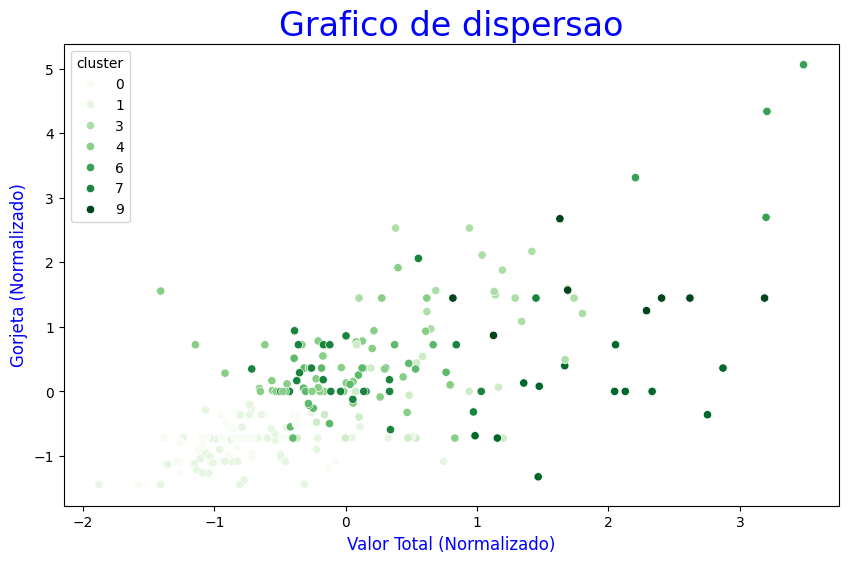

In [87]:
# Plotando o gráfico de dispersão.
import matplotlib.pyplot as plt
print("Plotando o gráfico de dispersão!!!")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='valor_total', y='gorjeta', hue='cluster', data=dados_limpos, palette='Greens')
plt.title('Grafico de dispersao', fontsize=24, color='blue')
plt.xlabel('Valor Total (Normalizado)', fontsize=12, color='blue')
plt.ylabel('Gorjeta (Normalizado)', fontsize=12, color='blue')
plt.show()


> Resolução:

Com base no algoritmo desenvolvido e na análise de relatório e gráficos (acima), o cluster que costuma dar mais gorjeta (independente do valor da conta), é o cluster nº **6**

OK


## **Questão 4**

Considere a figura abaixo. Nela, tem-se uma tarefa de classificação, onde se busca prever a senioridade de um profissional de acordo com o salário

<img src="https://github.com/OviedoVR/ML_especializacao/blob/main/assets/balanceamento-ilustracao.png?raw=true" width="75%"/>

Conforme observado, tem-se, nesse caso, duas classes:

- Profissional **pleno**: 0
- Profissional **sênior**: 1

Sabendo que cada ponto é um profissional no conjunto de dados e levando em conta o número de observações para cada classe, é interessante realizarmos uma re-amostragem, onde o foco é balancear o dataset em relação às classes. Diante disso, qual ténica de balanceamento foi utilizada neste caso: **oversampling** or **undersampling**?

> Resolução:

**Oversampling** e **Undersampling** são técnicas de amostragem aleatória usadas para equilibrar dados desbalanceados em Machine Learning e outros contextos:
- **Oversampling:** Consiste em adicionar mais cópias da classe minoritária aos dados. Isso pode ser feito selecionando aleatoriamente exemplos da classe minoritária e adicionando-os ao conjunto de dados de treinamento. Oversampling é frequentemente utilizado quando há uma quantidade limitada de dados e pode ser muito eficaz para algoritmos de aprendizado de máquina que são sensíveis a distribuições desbalanceadas. No entanto, pode aumentar a probabilidade de overfitting e o custo computacional.

- **Undersampling:** Consiste em remover algumas observações da classe majoritária até que as classes majoritária e minoritária estejam balanceadas. Isso pode ser feito selecionando aleatoriamente exemplos da classe majoritária e excluindo-os do conjunto de dados de treinamento. Undersampling pode ser uma boa escolha quando há uma grande quantidade de dados, mas pode resultar em overfitting e uma generalização ruim para o conjunto de teste.

De acordo com o gráfico, após o balanceamento, houve um aumento nas ocorrências da classe Profissional Sênior. Além disso, observa-se que se trata de um conjunto de dados pequeno. Portanto, podemos concluir que foi utilizada a técnica de **Oversampling**.

## **Questão 5**

Suponha que você está atuando em um projeto de dados onde o setor de marketing precisa estimar o investimento necessário para obter 600 cliques. Para isso, eles te forneceram dados históricos sobre campanhas passadas, conforme mostra o dicionário de dados abaixo:

| Coluna            | Descrição                                   |
|-------------------|---------------------------------------------|
| objetivo_campanha | objetivo da campanha de marketing           |
| visualizacoes     | total de visualizações obtidas nos anúncios |
| investimento_brl  | investimento em tráfego pago (em R$)        |
| cliques           | total de cliques obtidos nos anúncios       |


<br>

Utilize as colunas `cliques` e `investimento_brl` para treinar um modelo de regressão linear, onde  `cliques` será configurada como a variável preditora (**x**) e `investimento_brl` como variável resposta (**y**). Em outras palavras, deseja-se  estimar o investimento necessário (em R$) de acordo com a equação:

\begin{equation}
  \textrm{Investimento} = \beta_0 + \beta_1 \times \textrm{cliques}
\end{equation}

Premissas:

- O conjunto de dados não possui dados nulos/ausentes
- Não é preciso tratar os *outliers*
- Como só se tem apenas uma variável preditora (nas features), não é preciso normalizar os dados
- As campanhas são representativas para o problema de negócio que se quer resolver (estimar recursos financeiros para decidir a viabilidade da campanha).

Instruções:

1. Utilize qualquer algoritmo de regressão da sua escolha (`LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`, `KNeighborsRegressor`, `GaussianNB`, etc.)
2. Calcule o R² para os dados de teste
3. Visualize as variáveis preditora e resposta por meio de um gráfico de dispersão. Você pode usar o seguinte gráfico da biblioteca **Seaborn**:

```python
import seaborn as sns

sns.regplot(data=dados, x='VARIÁVEL PREDITORA', y='RESPOSTA')
```

* Dados

In [ ]:
!wget -q 'https://raw.githubusercontent.com/OviedoVR/ML_especializacao/main/dados/performance_campanhas_mkt.csv' -O 'performance_campanhas_mkt.csv'

* Bibliotecas

In [ ]:
# Bibliotecas:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# -- Manipulação de dados:
import numpy as np
import pandas as pd

> Resolução:

In [ ]:
campanhas = pd.read_csv('performance_campanhas_mkt.csv')
campanhas.head()

In [ ]:
# tamanho do dataset:
campanhas.shape

In [ ]:
# tipo de dados:
campanhas.info()

In [ ]:
# selecionar colunas que serão utilizadas:
...

In [ ]:
# features:
features = ...
# resposta:
resposta = ...

In [ ]:
# dados de treino e teste:
...

In [ ]:
# treino do modelo:
...

In [ ]:
# predições (dados de teste):
...

# cálculo do R² (usando y_teste e predições para os dados de teste):
# exemplo: r2_score(y_test, pred_test)
...

In [ ]:
# Visualização:
...

> Qual a estimativa de investimento necessário para atignir 600 cliques?

In [ ]:
cliques = ...
cliques = np.array(cliques).reshape(1, -1)

# predicação com base no número de cliques informado:
...

Estima-se um investimento de **R$ Y** para obter **600** cliques.